In [1]:
import pandas as pd
df=pd.read_csv("K8.data")

c:\users\ashay\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,

In [2]:
df.shape

(16771, 5410)

In [3]:
df.head

<bound method NDFrame.head of        -0.161  -0.014   0.002  -0.036  -0.033  -0.093  0.025  0.005   0.000  \
0      -0.158  -0.002  -0.012  -0.025  -0.012  -0.106  0.013  0.005   0.000   
1           ?       ?       ?       ?       ?       ?      ?      ?       ?   
2      -0.169  -0.025  -0.010  -0.041  -0.045  -0.069  0.038  0.014   0.008   
3      -0.183  -0.051  -0.023  -0.077  -0.092  -0.015  0.071  0.027   0.020   
4      -0.154   0.005  -0.011  -0.013  -0.002  -0.115  0.005  0.002  -0.003   
...       ...     ...     ...     ...     ...     ...    ...    ...     ...   
16766  -0.175  -0.036   0.005   -0.05  -0.065  -0.041  0.047  0.012   0.003   
16767  -0.158      -0  -0.015  -0.021  -0.004  -0.106   0.01  0.006   0.001   
16768  -0.174  -0.024   0.026  -0.044  -0.061  -0.097  0.049  0.007   0.001   
16769  -0.184  -0.072  -0.018  -0.091   -0.11    0.02  0.098  0.036   0.028   
16770  -0.155   0.001   -0.01  -0.018  -0.004  -0.113  0.009  0.004  -0.001   

       -0.015  ... 0.

In [4]:
a=[]
for i in range(1,5411):
    a.append(i)

In [5]:
df.columns=a

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16771 entries, 0 to 16770
Columns: 5410 entries, 1 to 5410
dtypes: float64(1), object(5409)
memory usage: 692.2+ MB


In [6]:
df.shape
df.isin(["?"]).sum(axis=0)

1       180
2       180
3       180
4       180
5       180
       ... 
5406     57
5407     57
5408     57
5409      0
5410      0
Length: 5410, dtype: int64

In [7]:
import numpy as np
data=df.replace('?',np.nan)

In [8]:
data.isin(['?']).sum(axis=0)

1       0
2       0
3       0
4       0
5       0
       ..
5406    0
5407    0
5408    0
5409    0
5410    0
Length: 5410, dtype: int64

In [9]:
y=data[5409]
data1=data.drop([5409,5410],axis=1)

# Predicting the missing values

In [10]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
array=imp_mean.fit_transform(data1)

### Converting the Array from Simple Imputer to DataFrame

In [11]:
a=[]
for i in range(1,5409):
    a.append(i)
data1=pd.DataFrame(array,columns=a)

In [12]:
data1.shape


(16771, 5408)

 ### Label Encoder for Converting target values from categorical to numerical

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [14]:
y_df=pd.DataFrame(y, columns = ['target'])
y_df.shape

(16771, 1)

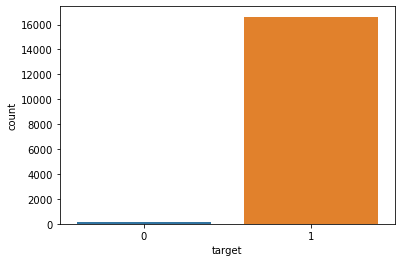

In [27]:
import seaborn as sns
sns.countplot(x='target',data=y_df)

In [29]:
print(y_df['target'].value_counts())

1    16628
0      143
Name: target, dtype: int64


### As it can be seen the the data for the inactive class is much more as compared to active class.So we will use Synthetic Minority overSampling technique to maximize the minority class. 

In [30]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(data1,y_df)

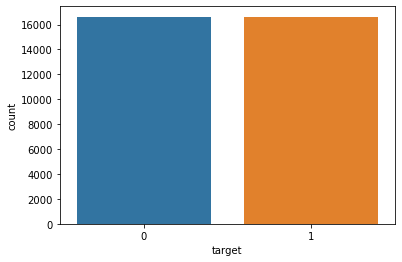

In [32]:
sns.countplot(x='target',data=y_smote)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.3,random_state=0)
print(x_train.shape)
print(x_test.shape)

In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_std=sc.fit_transform(x_train)

In [35]:
pd.DataFrame(x_train_std).head()

,0,1,2,3,4,5,6,7,8,9,...,5398,5399,5400,5401,5402,5403,5404,5405,5406,5407
0,0.185443,0.062923,0.037273,0.047275,0.078693,-0.056347,-0.078842,-0.063237,-0.047251,-0.003511,...,0.292124,-0.061537,-0.762206,-0.226955,-0.272954,-0.346221,0.032711,-0.396116,0.217849,0.287167
1,0.104938,0.052989,0.038937,0.048289,0.047012,0.019659,0.069538,0.005807,0.017689,0.045951,...,0.001690,-0.016164,0.003274,-0.014680,0.018539,-0.014045,0.000404,0.039414,-0.002387,0.014088
2,0.165207,-0.015939,0.045464,-0.011662,-0.058637,0.040643,-0.061113,0.035498,0.006222,-0.053406,...,-0.668873,0.890547,0.324123,0.644995,0.632238,0.641331,-0.112095,0.406046,0.634993,-0.836270
3,0.139453,-0.105086,-0.007777,-0.144269,-0.254228,0.182197,-0.037711,0.178116,0.086431,-0.074196,...,-1.950203,2.682705,0.444826,1.856036,1.808988,1.662936,-0.546510,1.288424,2.164522,-2.350467
4,0.192801,0.086924,0.041368,0.091477,0.120308,-0.079939,-0.084515,-0.096149,-0.067303,0.013120,...,3.922560,-0.789601,0.444826,-0.130071,-1.359185,-0.107846,1.915179,-0.556549,-0.338344,0.677927


In [54]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
pipe_lr=Pipeline([('pca',PCA()),('clf',SVC())])
par_grid={'pca__n_components':[10,20,30],
          'clf__C':[1,2,3,4],
          'clf__kernel':['rbf','linear'],
          }
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(estimator=pipe_lr,param_grid=par_grid,cv=10,scoring='accuracy')
#gs.estimator.get_params().keys() 

In [ ]:
gs=gs.fit(x_train,y_train.values.ravel())
print('Best parameters=',gs.best_params_)
print('Best Score=',gs.best_score_)
clf=gs.best_estimator_
print(clf)
print('Test acc=',clf.score(x_test,y_test))

In [157]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca=PCA(n_components=50)
x_pca=pca.fit_transform(x_smote)

<BarContainer object of 50 artists>

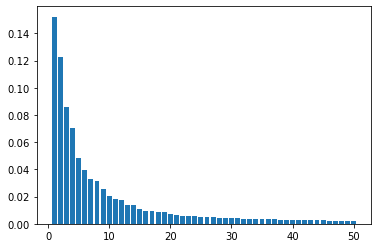

In [159]:
plt.bar(range(1,51),pca.explained_variance_ratio_)

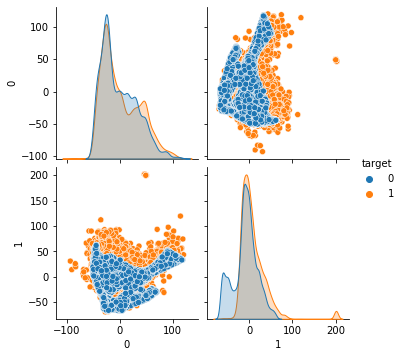

In [149]:
df_x_pca=pd.DataFrame(x_pca)
d1=pd.concat([df_x_pca,y_smote],axis=1)
sns.pairplot(d1,hue='target')

In [133]:
print(pca.explained_variance_ratio_)

[0.15223875 0.12261871 0.08566157 0.07057437 0.04866185 0.03935424
 0.03320375 0.03144605 0.02545635 0.02051773 0.01788735 0.01770102
 0.01403399 0.01369524 0.01112981 0.00960262 0.00905648 0.00895415
 0.00843994 0.00734246 0.00659546 0.00607527 0.00575317 0.00553005
 0.00516843 0.00499708 0.00492526 0.00452103 0.00439379 0.00427963
 0.003918   0.00381106 0.00376691 0.00364978 0.00349637 0.00338264
 0.00327721 0.00312893 0.00302817 0.00286134 0.00272563 0.00266317
 0.0026065  0.00256546 0.00245097 0.00234663 0.0022911  0.00221926
 0.00218603 0.00210734]


In [150]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_pca,y_smote,test_size=0.3,random_state=0)
print(x_train.shape)
print(x_test.shape)

(23279, 2)
(9977, 2)


In [152]:
from sklearn.svm import SVC
sp=SVC(C=10,kernel='rbf')
sp.fit(x_train_std,y_train)
y_train_pred=sp.predict(x_train_std)
y_test_pred=sp.predict(x_test_std)

In [153]:
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train_pred,y_train)
test_acc=accuracy_score(y_test_pred,y_test)
print(train_acc,test_acc)

0.677219811847588 0.6754535431492432


In [154]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.71      0.59      0.65      5016
           1       0.65      0.76      0.70      4961

    accuracy                           0.68      9977
   macro avg       0.68      0.68      0.67      9977
weighted avg       0.68      0.68      0.67      9977



ValueError: x and y must be the same size

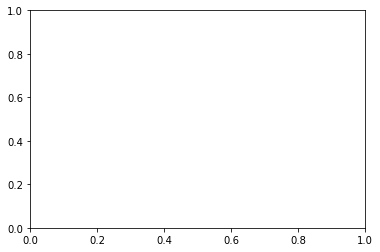

In [156]:
import matplotlib.pyplot as plt
plt.scatter(x_train[0],y_train,label='data points')
plt.plot(x_train,y_train_pred,label='svc',c='r',lw=2)
idx=x.flatten().argsort()
plt.legend()

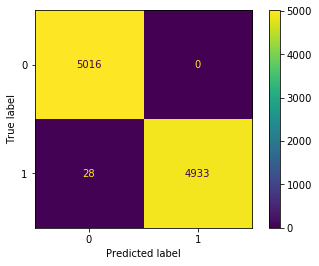

In [139]:
from sklearn.metrics import plot_confusion_matrix
cm=plot_confusion_matrix(sp,x_test_std,y_test)
print(cm)

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.3,random_state=0)
print(x_train.shape)
print(x_test.shape)

(23279, 1616)
(9977, 1616)


In [84]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_std=sc.fit_transform(x_train)
x_test_std=sc.transform(x_test)

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=10)
knc.fit(x_train_std,y_train)
y_train_pred_kc=sp.predict(x_train_std)
y_test_pred_kc=sp.predict(x_test_std)

In [86]:
from sklearn.metrics import accuracy_score
train_acc_kc=accuracy_score(y_train_pred_kc,y_train)
test_acc_kc=accuracy_score(y_test_pred_kc,y_test)
print(train_acc_kc,test_acc_kc)

0.9997852141415009 0.998997694697805


In [87]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_test_pred_kc)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5016
           1       1.00      1.00      1.00      4961

    accuracy                           1.00      9977
   macro avg       1.00      1.00      1.00      9977
weighted avg       1.00      1.00      1.00      9977



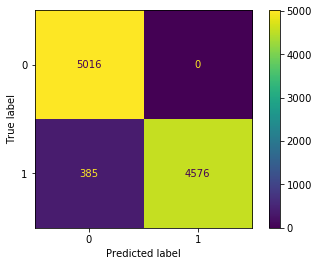

In [89]:
from sklearn.metrics import plot_confusion_matrix
cm=plot_confusion_matrix(knc,x_test_std,y_test)
print(cm)

In [92]:
from sklearn.ensemble import ExtraTreesClassifier
gbc=ExtraTreesClassifier(n_estimators=150)
gbc.fit(x_train_std,y_train)
y_train_pred_gbc=sp.predict(x_train_std)
y_test_pred_gbc=sp.predict(x_test_std)
from sklearn.metrics import accuracy_score
train_acc_gbc=accuracy_score(y_train_pred_gbc,y_train)
test_acc_gbc=accuracy_score(y_test_pred_gbc,y_test)
print(train_acc_gbc,test_acc_gbc)

0.9997852141415009 0.998997694697805


In [93]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_test_pred_gbc)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5016
           1       1.00      1.00      1.00      4961

    accuracy                           1.00      9977
   macro avg       1.00      1.00      1.00      9977
weighted avg       1.00      1.00      1.00      9977



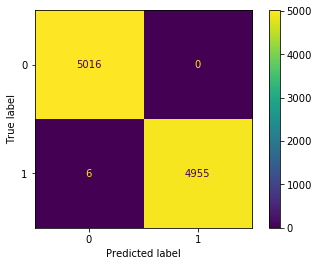

In [94]:
from sklearn.metrics import plot_confusion_matrix
cm=plot_confusion_matrix(gbc,x_test_std,y_test)
print(cm)

In [95]:
from sklearn.model_selection import train_test_split
x_train_2,x_test_2,y_train_2,y_test_2=train_test_split(x_smote,y_smote,test_size=0.4,random_state=13)
print(x_train_2.shape)
print(x_test_2.shape)

(19953, 1616)
(13303, 1616)


In [96]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_std=sc.fit_transform(x_train_2)
x_test_std=sc.transform(x_test_2)

In [98]:
from sklearn.svm import SVC
sp=SVC(C=13,kernel='rbf')
sp.fit(x_train_std,y_train_2)
y_train_pred=sp.predict(x_train_std)
y_test_pred=sp.predict(x_test_std)

In [99]:
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train_pred,y_train_2)
test_acc=accuracy_score(y_test_pred,y_test_2)
print(train_acc,test_acc)

0.9998997644464491 0.9987220927610313


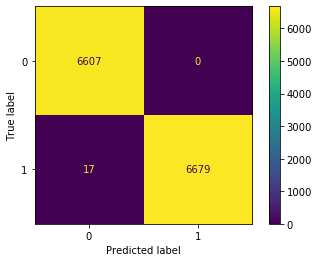

In [101]:
from sklearn.metrics import plot_confusion_matrix
cm=plot_confusion_matrix(sp,x_test_std,y_test_2)
print(cm)